<a href="https://colab.research.google.com/github/nattntn/PMU-B-PersonalAI/blob/main/BiTNet/PMUB_Personal_AI_Image_classification_EfficientNetB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats vs Dogs : Image Classification using EfficienNet
จะสอนให้ Network แยกระหว่าง แมวกับหมา

## Data Description

**The training archive contains 25,000 images of dogs and cats.**

แบ่งเป็นข้อมูลของ หมา เเมว อย่างละครึ่ง


## Install

In [1]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00


## Loading Libraries

> TensorFlow

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd
from PIL import Image, ImageFile

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras import callbacks
from keras.callbacks import Callback
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.optimizers import Adam
from efficientnet.keras import center_crop_and_resize, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#ดู version ของ tf
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
dataset_url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip' #url of datasets

In [6]:
# !pip3 install tensorflow==2.14.0

In [7]:
# !pip3 uninstall tensorflow
# !pip3 install tensorflow==2.14.0

In [8]:
# print(tf.__version__)

## Data Extraction

In [9]:
# data_dir = '/content/sample_data'
# %cd '/content/sample_data'
data_dir = '/content/drive/MyDrive/PMUB:Personal_AI'
%cd '/content/drive/MyDrive/PMUB:Personal_AI'
!pwd

/content/drive/MyDrive/PMUB:Personal_AI
/content/drive/MyDrive/PMUB:Personal_AI


In [10]:
# load
path_to_downloaded_file = tf.keras.utils.get_file( # load
    origin=dataset_url,
    extract=True,
)

824887076/824887076 [==============================] - 7s 0us/step


In [11]:
path_to_downloaded_file

'/root/.keras/datasets/kagglecatsanddogs_5340.zip'

In [12]:
import zipfile

with zipfile.ZipFile(path_to_downloaded_file, 'r') as zipp:
    zipp.extractall(data_dir) #extract data จากที่เป็น zip file

In [13]:
import glob
# ดูจำนวนภาพใน folder
Cat_count = len(list(glob.glob(f'{data_dir}/PetImages/Cat/*.jpg'))) # Main folder:PetImages, sub forder:Cat,Dog
print('Cat: ', Cat_count)

Dog_count = len(list(glob.glob(f'{data_dir}/PetImages/Dog/*.jpg')))
print('Dog: ', Dog_count)

Cat:  12500
Dog:  12500


### Loading Images in a Dataframe

In [14]:
df_dada = pd.DataFrame(columns=['filename', 'label']) # create dataframe
list_dir = ["Cat", "Dog"]
for label in list_dir:
    filenames = list(glob.glob(f'{data_dir}/PetImages/{label}/*.jpg'))
    #labels = [x.split("/")[3] for x in filenames]
    data = pd.DataFrame({"filename": filenames, "label": label})
    data = data.iloc[:1250,] #  1250 row / list_dir
    df_dada = df_dada.append(data)

print(df_dada.shape)
df_dada.head()

<ipython-input-14-9ce434094263>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dada = df_dada.append(data)


(2500, 2)


<ipython-input-14-9ce434094263>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_dada = df_dada.append(data)


filename label
0  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
1  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
2  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
3  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
4  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat

In [15]:
df_dada[df_dada['label']=='Cat']

filename label
0     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
1     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
2     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
3     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
4     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
...                                                 ...   ...
1245  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
1246  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
1247  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
1248  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
1249  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat

[1250 rows x 2 columns]

In [16]:
df_dada[df_dada['label']=='Dog']

filename label
0     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
1     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
2     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
3     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
4     /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
...                                                 ...   ...
1245  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
1246  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
1247  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
1248  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
1249  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog

[1250 rows x 2 columns]

## Data Exploration

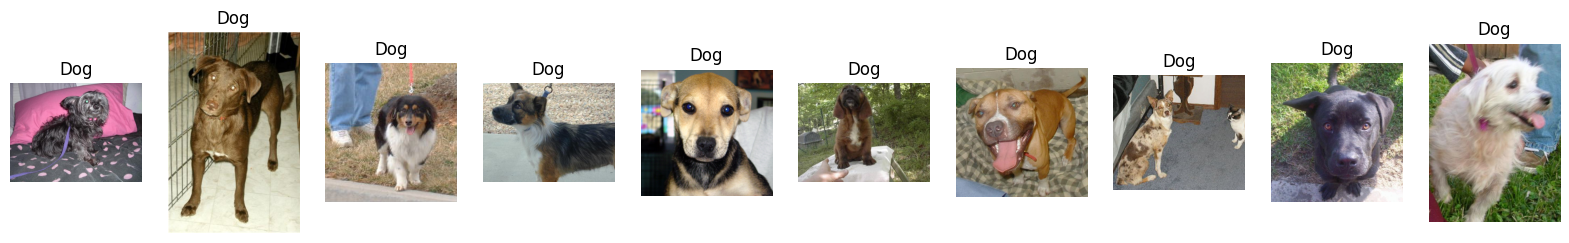

In [17]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = f'{data_dir}/PetImages/Dog/{str(i)}.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

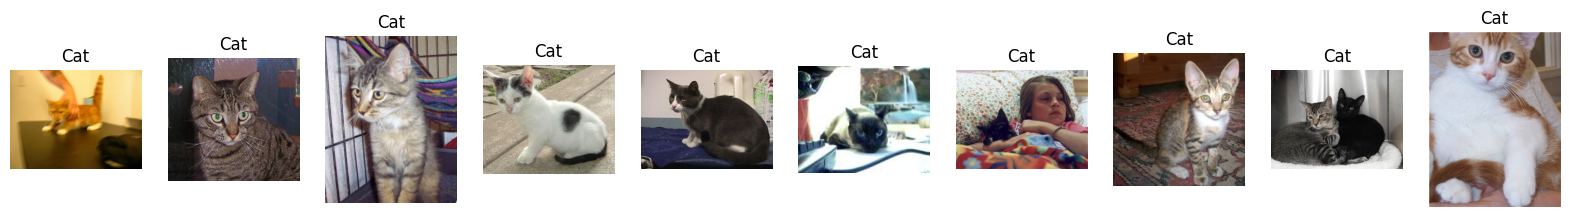

In [18]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):

    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = f'{data_dir}/PetImages/Cat/{str(i)}.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

### Train Test Split

In [19]:
# train test split using dataframe

labels = df_dada['label'] #Extracts the column 'label' from the DataFrame

X_train, X_temp = train_test_split(df_dada, test_size=0.2, stratify=labels, random_state = 42) #stratify=labels ช่วยให้  labels กระจายเท่าๆ กันทั้ง train&test
#X_train = 80% of df_dada || X_temp = 20% of df_dada

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)
#X_test = 50% of X_temp || X_val = 50% of X_temp
print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (2000, 2)
The shape of test data (250, 2)
The shape of validation data (250, 2)


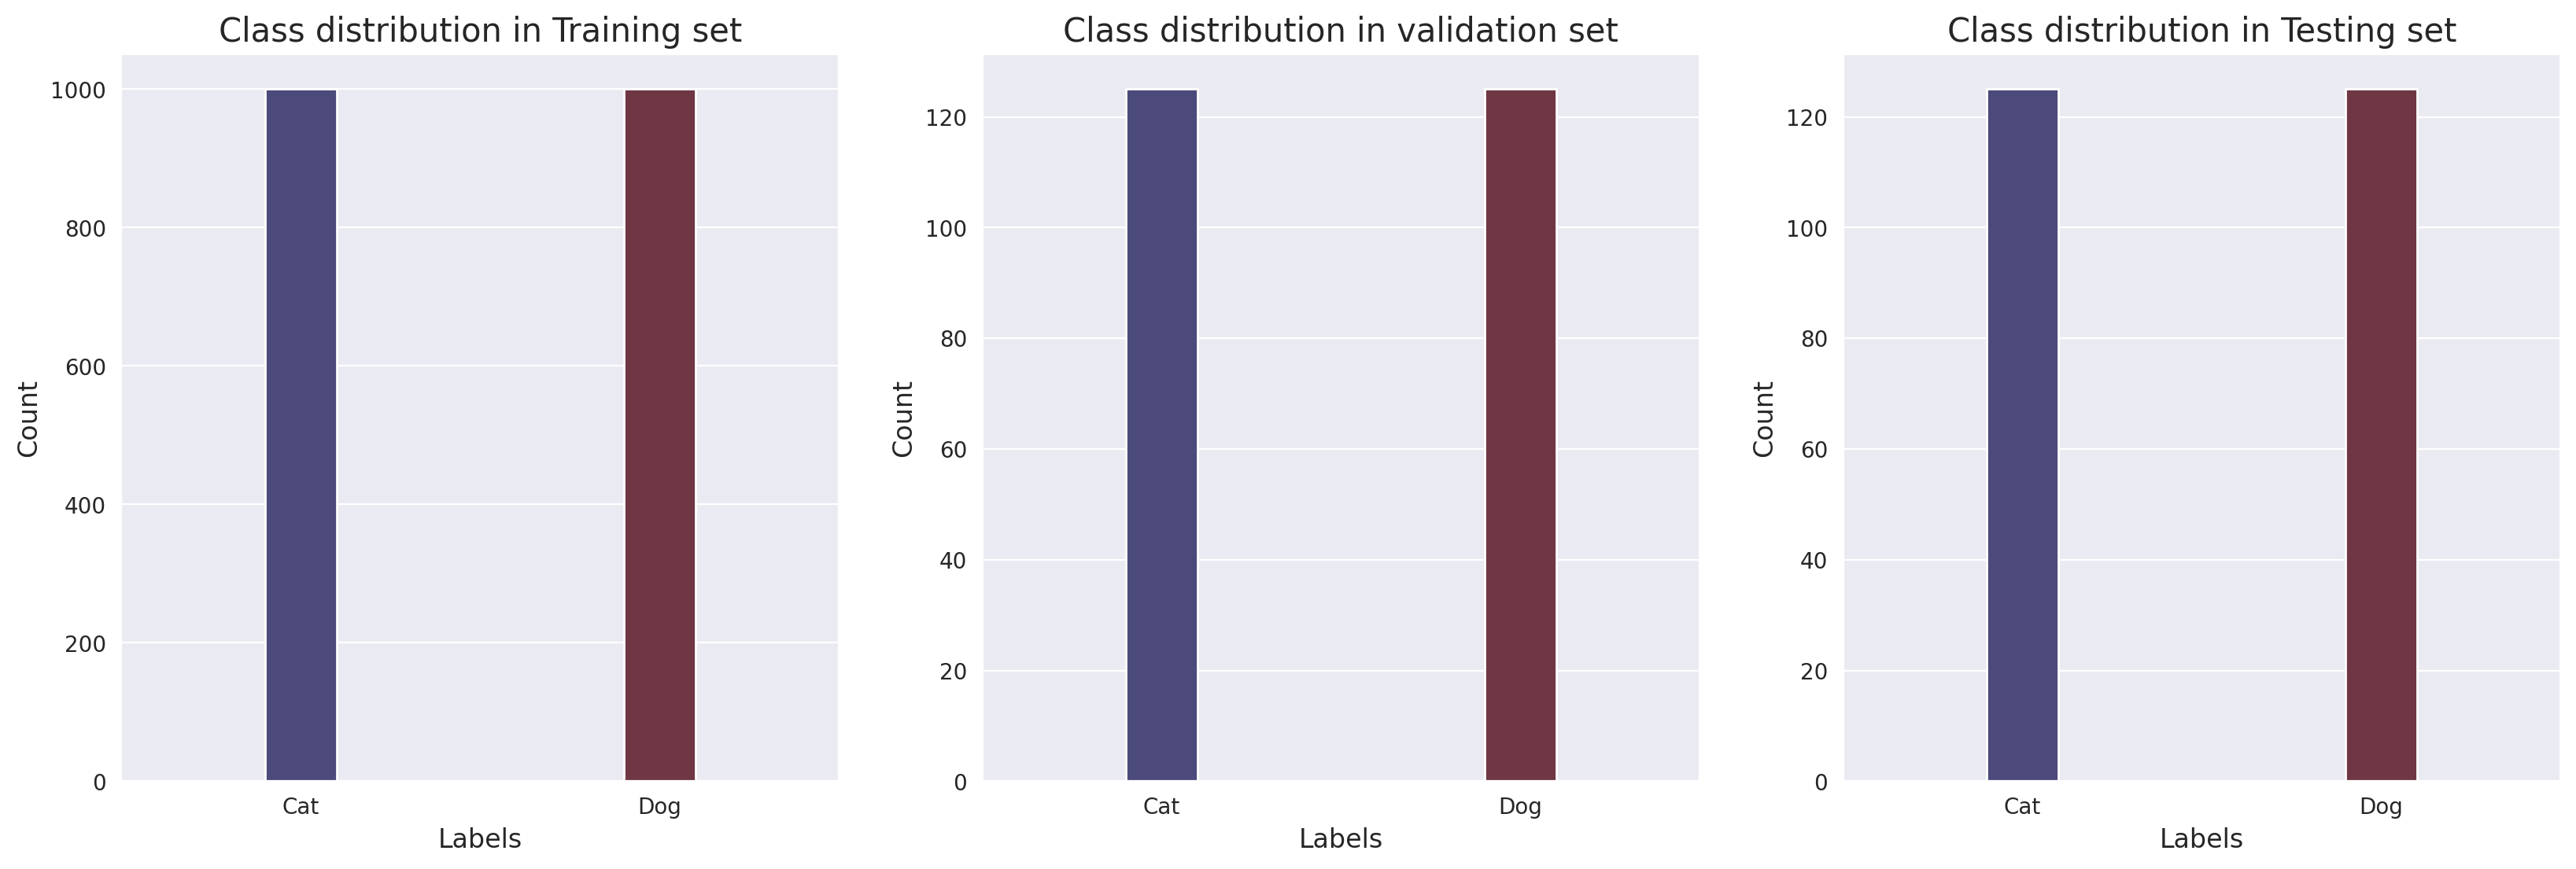

In [20]:
# plot ดูการกระจายของข้อมูลในแต่ละ dataset
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

### Data Preparation

In [21]:
# parameters
target_size = (456, 456)
batch_size = 16 # จน.ภาพที่ network จะเห็นพร้อม ๆ กันใน 1 run

### Image Data Generator

-  The data for will used by flow_from_dataframe.

- The batch size is 16 and the image size is (456, 456).

In [22]:
# !pip install --upgrade pillow

In [23]:
# Creating image data generator
# data generator คือการload data ขึ้นมาเพื่อที่จะได้ส่งต่อให้ Network เอาไปทำการ train ต่อ
train_datagen = ImageDataGenerator(rescale=1./255, # rescale=1./255 ทำการ  normalrize ภาพให้มีขนาด 0-1 เนื่องจากภาพปกติเป็น RGB ทำให้มีค่า 0-255
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'nearest',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255) # test จะไม่ทำ augment โหลดมาเฉยๆ

In [24]:
# Applying image data gernerator to train and test data
# จะดึง data เเต่ละอันมาจากไหน
# flow_from_dataframe ต้องระบุว่า Data เราอยู่ไหน label คืออะไร
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = None,
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = batch_size,
                                                    target_size = target_size,
                                                    class_mode='categorical',
                                                    color_mode= 'rgb'
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = None,
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = batch_size,
                                                 target_size = target_size,
                                                 class_mode='categorical',
                                                 color_mode= 'rgb'
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = None,
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = batch_size,
                                                  target_size = target_size,
                                                  class_mode='categorical',
                                                  color_mode= 'rgb'
                                                 )

Found 2000 validated image filenames belonging to 2 classes.
Found 250 validated image filenames belonging to 2 classes.
Found 250 validated image filenames belonging to 2 classes.


In [25]:
#label
labels = (train_generator.class_indices)
print(labels)

{'Cat': 0, 'Dog': 1}


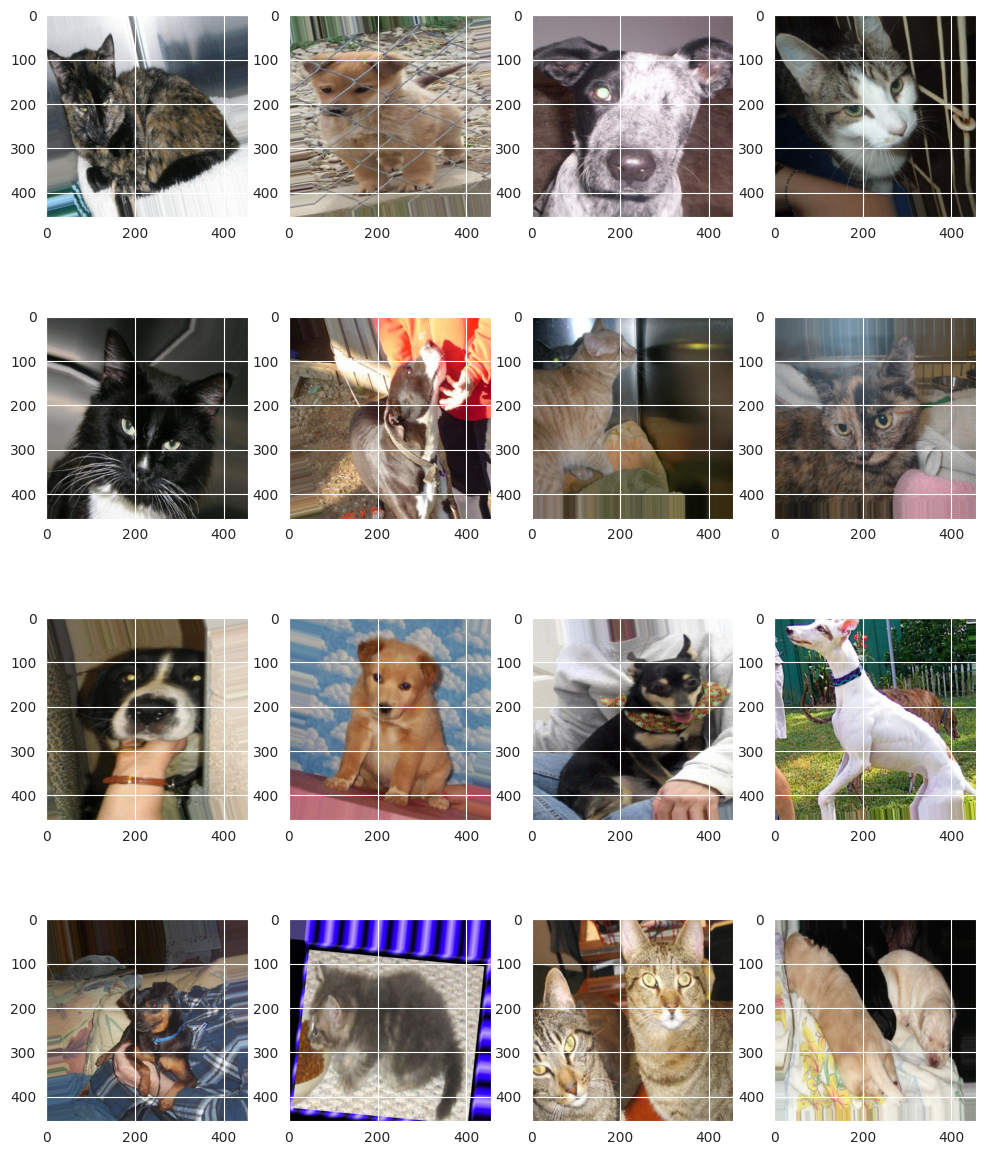

In [26]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 4
rows = 4
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

## EfficienNet Model

In [27]:
# loading pretrained conv base model
from efficientnet.keras import EfficientNetB5 as Net

input_shape = (456, 456, 3) #(w,h,rgb)
conv_base = Net(weights='imagenet', include_top=False, input_shape=input_shape) #weights='imagenet' เอา w ที่ pre-train มาจาก imagenet//  include_top=False ตัดหัวออก
print(f"Input Shape: {input_shape}")

# create new model with a new classification layer
x = conv_base.output
global_average_layer = layers.GlobalAveragePooling2D(name = 'head_pooling')(x) #
dropout_layer = layers.Dropout(0.20,name = 'head_dropout')(global_average_layer)
prediction_layer = layers.Dense(2, activation='softmax',name = 'predict_Cat_Dog')(dropout_layer)

### FC layer
model = models.Model(inputs= conv_base.input, outputs=prediction_layer, name = 'EffNet_Cat_Dog')

115515256/115515256 [==============================] - 1s 0us/step
Input Shape: (456, 456, 3)


In [28]:
### Unfreeze FC layer
print('[INFO]: This is the number of trainable layers '
      'before freezing the conv base:', len(model.trainable_weights))
print('[INFO]: Freezing hidden layers...')
for layer in conv_base.layers:
    layer.trainable = False

print('[INFO]: This is the number of trainable layers '
        'after freezing the conv base:', len(model.trainable_weights))
print('-'*125)

[INFO]: This is the number of trainable layers before freezing the conv base: 506
[INFO]: Freezing hidden layers...
[INFO]: This is the number of trainable layers after freezing the conv base: 2
-----------------------------------------------------------------------------------------------------------------------------


In [29]:
model.summary()

Model: "EffNet_Cat_Dog"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 456, 456, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 228, 228, 48)         1296      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 228, 228, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 228, 228, 48)         0         ['stem_bn[0][0]']

## Callbacks

- ReduceLROnPlateau : Reduce learning rate when a metric has stopped improving.

In [30]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                              patience=2,
                                              factor=0.5,
                                              min_lr = 0.00001,
                                              verbose = 1)

## Compile the model

In [31]:
from keras.optimizers import Adam

lr=1e-4
#Training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=lr),
              metrics=['acc'])

## Fit the model

In [32]:
num_epochs = 20
history_eff = model.fit(train_generator,
                        epochs = num_epochs,
                        validation_data = val_generator,
                        callbacks=learning_rate_reduction)

Epoch 1/20
125/125 [==============================] - ETA: 0s - loss: 0.4422 - acc: 0.8435

125/125 [==============================] - 163s 1s/step - loss: 0.4422 - acc: 0.8435 - val_loss: 0.2631 - val_acc: 0.9760 - lr: 1.0000e-04
Epoch 2/20
125/125 [==============================] - ETA: 0s - loss: 0.2141 - acc: 0.9540

125/125 [==============================] - 136s 1s/step - loss: 0.2141 - acc: 0.9540 - val_loss: 0.1378 - val_acc: 0.9880 - lr: 1.0000e-04
Epoch 3/20
125/125 [==============================] - ETA: 0s - loss: 0.1367 - acc: 0.9725

125/125 [==============================] - 135s 1s/step - loss: 0.1367 - acc: 0.9725 - val_loss: 0.0874 - val_acc: 0.9920 - lr: 1.0000e-04
Epoch 4/20
125/125 [==============================] - ETA: 0s - loss: 0.0989 - acc: 0.9810

125/125 [==============================] - 135s 1s/step - loss: 0.0989 - acc: 0.9810 - val_loss: 0.0653 - val_acc: 0.9920 - lr: 1.0000e-04
Epoch 5/20
125/125 [==============================] - ETA: 0s - loss: 0.0795 - acc: 0.9820

125/125 [==============================] - 136s 1s/step - loss: 0.0795 - acc: 0.9820 - val_loss: 0.0522 - val_acc: 0.9920 - lr: 1.0000e-04
Epoch 6/20
125/125 [==============================] - ETA: 0s - loss: 0.0702 - acc: 0.9845

125/125 [==============================] - 136s 1s/step - loss: 0.0702 - acc: 0.9845 - val_loss: 0.0430 - val_acc: 0.9920 - lr: 1.0000e-04
Epoch 7/20
125/125 [==============================] - ETA: 0s - loss: 0.0661 - acc: 0.9795

125/125 [==============================] - 135s 1s/step - loss: 0.0661 - acc: 0.9795 - val_loss: 0.0384 - val_acc: 0.9920 - lr: 1.0000e-04
Epoch 8/20
125/125 [==============================] - ETA: 0s - loss: 0.0620 - acc: 0.9825

125/125 [==============================] - 140s 1s/step - loss: 0.0620 - acc: 0.9825 - val_loss: 0.0347 - val_acc: 0.9920 - lr: 1.0000e-04
Epoch 9/20
125/125 [==============================] - ETA: 0s - loss: 0.0587 - acc: 0.9820

125/125 [==============================] - 135s 1s/step - loss: 0.0587 - acc: 0.9820 - val_loss: 0.0313 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 10/20
125/125 [==============================] - ETA: 0s - loss: 0.0500 - acc: 0.9845

125/125 [==============================] - 140s 1s/step - loss: 0.0500 - acc: 0.9845 - val_loss: 0.0283 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 11/20
125/125 [==============================] - ETA: 0s - loss: 0.0517 - acc: 0.9860

125/125 [==============================] - 136s 1s/step - loss: 0.0517 - acc: 0.9860 - val_loss: 0.0257 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 12/20
125/125 [==============================] - ETA: 0s - loss: 0.0461 - acc: 0.9870

125/125 [==============================] - 139s 1s/step - loss: 0.0461 - acc: 0.9870 - val_loss: 0.0240 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 13/20
125/125 [==============================] - ETA: 0s - loss: 0.0518 - acc: 0.9840

125/125 [==============================] - 139s 1s/step - loss: 0.0518 - acc: 0.9840 - val_loss: 0.0230 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 14/20
125/125 [==============================] - ETA: 0s - loss: 0.0457 - acc: 0.9850

125/125 [==============================] - 135s 1s/step - loss: 0.0457 - acc: 0.9850 - val_loss: 0.0223 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 15/20
125/125 [==============================] - ETA: 0s - loss: 0.0426 - acc: 0.9865

125/125 [==============================] - 137s 1s/step - loss: 0.0426 - acc: 0.9865 - val_loss: 0.0207 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 16/20
125/125 [==============================] - ETA: 0s - loss: 0.0389 - acc: 0.9885

125/125 [==============================] - 139s 1s/step - loss: 0.0389 - acc: 0.9885 - val_loss: 0.0199 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 17/20
125/125 [==============================] - ETA: 0s - loss: 0.0441 - acc: 0.9860

125/125 [==============================] - 135s 1s/step - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0193 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 18/20
125/125 [==============================] - ETA: 0s - loss: 0.0357 - acc: 0.9890

125/125 [==============================] - 134s 1s/step - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0186 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 19/20
125/125 [==============================] - ETA: 0s - loss: 0.0387 - acc: 0.9870

125/125 [==============================] - 137s 1s/step - loss: 0.0387 - acc: 0.9870 - val_loss: 0.0176 - val_acc: 0.9960 - lr: 1.0000e-04
Epoch 20/20
125/125 [==============================] - ETA: 0s - loss: 0.0338 - acc: 0.9890

125/125 [==============================] - 135s 1s/step - loss: 0.0338 - acc: 0.9890 - val_loss: 0.0165 - val_acc: 0.9960 - lr: 1.0000e-04


In [33]:
# save model
## Set up model path
#Categorical Crossentropy
modelName  = "EffNetB5_CategoricalCrossentropy_Cat_Dog_Classes.h5"
Model2save = f"/content/drive/MyDrive/{modelName}"
model.save(Model2save)
### print
print(f"[INFO]: Save Model as: {Model2save}")
print(f"*"*100)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Save Model as: /content/drive/MyDrive/EffNetB5_CategoricalCrossentropy_Cat_Dog_Classes.h5
****************************************************************************************************


# Plot the results

loss ลด = ตัวแบบยังสามารถเรียนรู้ได้ต่อ เเต่ถ้านิ่งแสดงว่าตัวแบบไม่สามารถเรียนรู้อะไรได้แล้ว

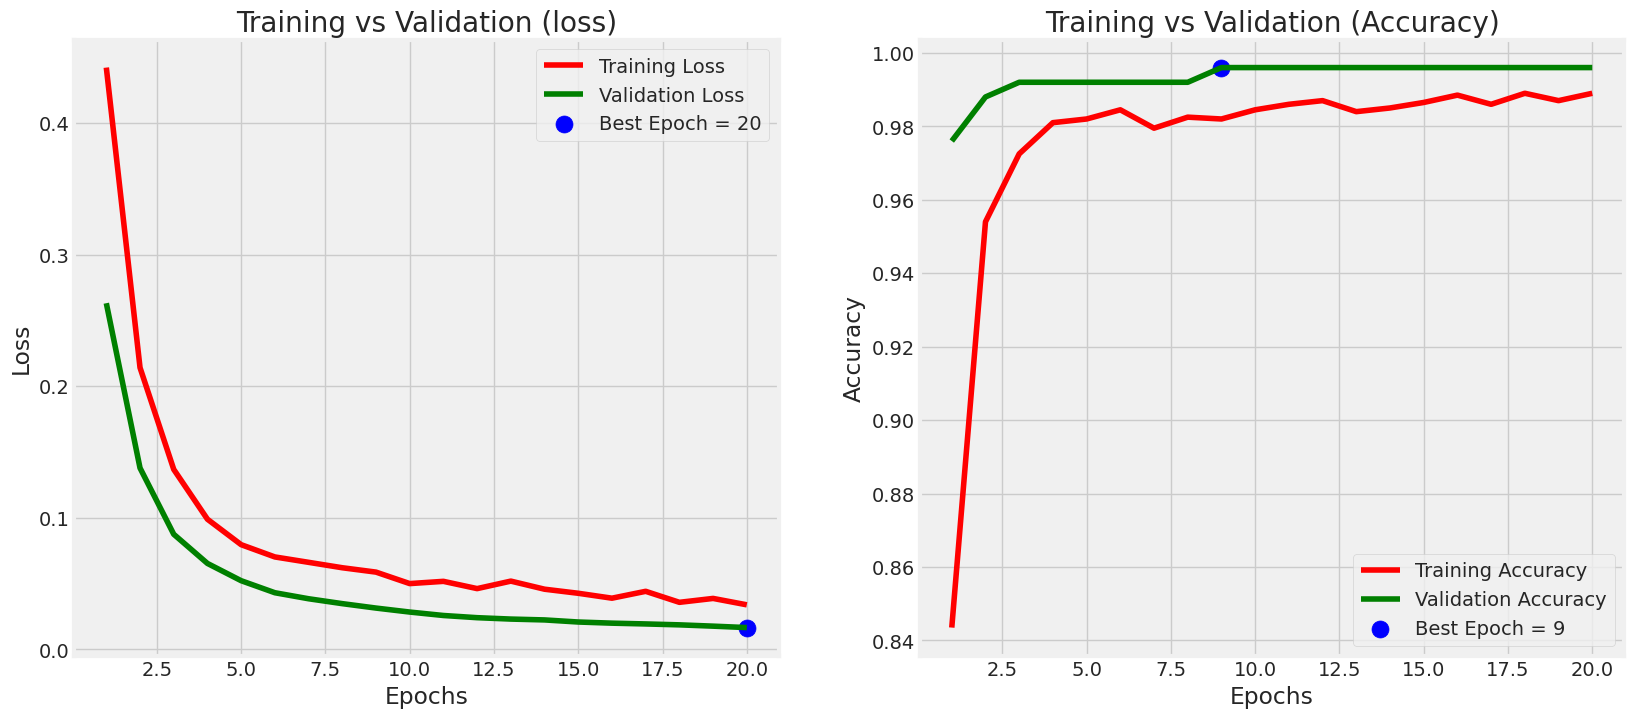

In [34]:
train_acc = history_eff.history['acc']
train_loss = history_eff.history['loss']

val_acc = history_eff.history['val_acc']
val_loss = history_eff.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show();

# Evaluation

In [35]:
# print acc, loss ของ epochs สุดท้ายออกมาดู
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = val_generator, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = val_generator, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.19999837875366
The Loss of the model for training data is: 0.026125315576791763
The accuracy of the model for validation data is: 99.59999918937683
The Loss of the model for validation data is: 0.016512233763933182


# Prediction

In [36]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd

from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file

## Load model

load model  มาใช้งานต่อ

In [37]:
model_dir = "/content/drive/MyDrive/EffNetB5_CategoricalCrossentropy_Cat_Dog_Classes.h5"
model_B5 = load_model(model_dir)
height = width = model_B5.input_shape[1]
print(height, width)

456 456


In [38]:
model_B5.summary()

Model: "EffNet_Cat_Dog"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 456, 456, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 228, 228, 48)         1296      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 228, 228, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 228, 228, 48)         0         ['stem_bn[0][0]']

In [39]:
# label_dict = {0: 'Cat', 1: 'Dog'}
# print(label_dict)

label_dict = dict((v,k) for k,v in labels.items())
print(label_dict)

{0: 'Cat', 1: 'Dog'}


In [40]:
# resize image ใหม่ ให้ตรงกับ input size ของ model เราที่เราตั้งไว้
def process_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.

    return x

In [41]:
# func ในการ predict
def predict(img_path, model_B5):
    img_x = process_image(img_path)
    predict = model_B5.predict([img_x])
    predict0 = predict[0]
    result = np.argmax(predict0)
    pred_label = label_dict[result]
    pred_prob = predict0[result]

    print(f"[INFO]: Predict Classes ==> {pred_label} With Probability {pred_prob*100:.4f}%")

In [ ]:
img_path1 = "/content/drive/MyDrive/_119932207_indifferentcatgettyimages.jpg"
predict(img_path1, model_B5)
image.load_img(img_path1, target_size=(height, width))

In [ ]:
img_path2 = "/content/drive/MyDrive/images.jpg"
predict(img_path2, model_B5)
image.load_img(img_path2, target_size=(height, width))

In [ ]:
img_path3 = "/content/drive/MyDrive/Hero Pedigree Cats.jpg"
predict(img_path3, model_B5)
image.load_img(img_path3, target_size=(height, width))

# Exercise

ทดลองนำภาพ นก รถยนต์ เสือ สิงโต และ สุนัขจิ้งจอก มาทำการทำนายและรายงานผลการทำนายแต่ละภาพ

In [ ]:
img_path4 = "/content/drive/MyDrive/black-maned-lion-shem-compion-786x500.jpg"
predict(img_path4, model_B5)
image.load_img(img_path4, target_size=(height, width))

1/1 [==============================] - 4s 4s/step
[INFO]: Predict Classes ==> Dog With Probability 97.0926%


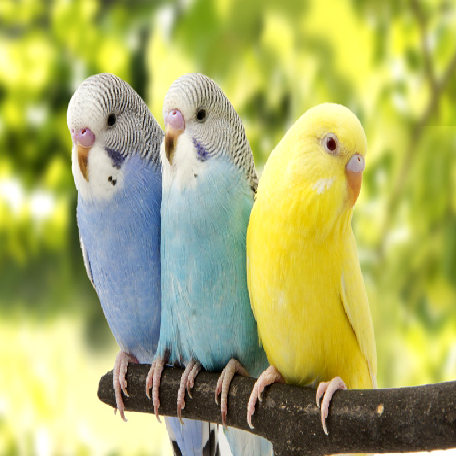

In [51]:
#birds
img_path5 = "/content/drive/MyDrive/bird.jpg"
predict(img_path5, model_B5)
image.load_img(img_path5, target_size=(height, width))

1/1 [==============================] - 0s 185ms/step
[INFO]: Predict Classes ==> Dog With Probability 70.4523%


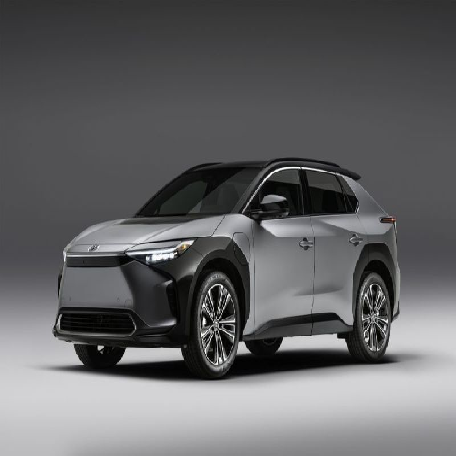

In [52]:
#car
img_path6 = "/content/drive/MyDrive/car.jpg"
predict(img_path6, model_B5)
image.load_img(img_path6, target_size=(height, width))

1/1 [==============================] - 0s 70ms/step
[INFO]: Predict Classes ==> Cat With Probability 91.3941%


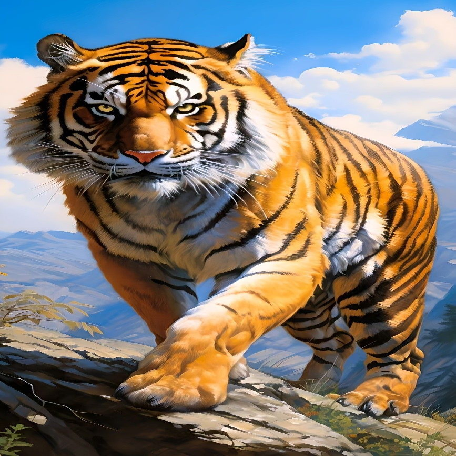

In [53]:
#tiger
img_path7 = "/content/drive/MyDrive/tiger.jpg"
predict(img_path7, model_B5)
image.load_img(img_path7, target_size=(height, width))

1/1 [==============================] - 0s 67ms/step
[INFO]: Predict Classes ==> Dog With Probability 88.2368%


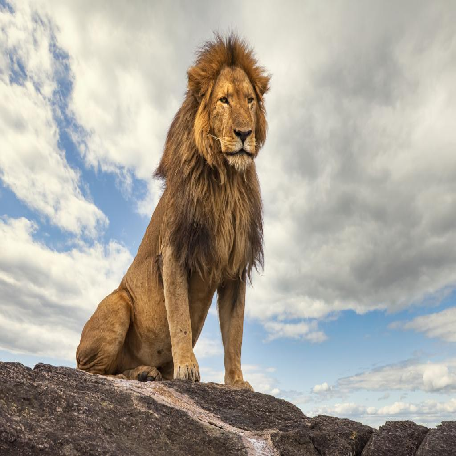

In [54]:
#lion
img_path8 = "/content/drive/MyDrive/lion.jpg"
predict(img_path8, model_B5)
image.load_img(img_path8, target_size=(height, width))

1/1 [==============================] - 0s 38ms/step
[INFO]: Predict Classes ==> Cat With Probability 71.6830%


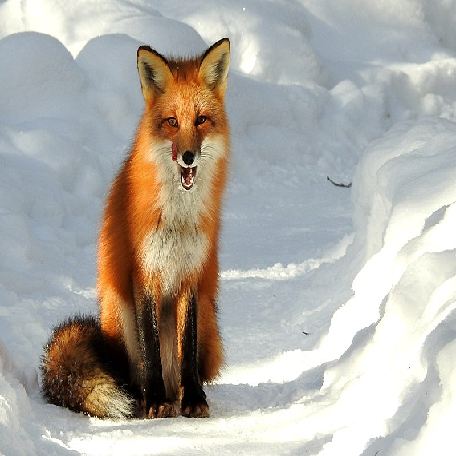

In [55]:
#fox
img_path9 = "/content/drive/MyDrive/fox.jpg"
predict(img_path9, model_B5)
image.load_img(img_path9, target_size=(height, width))

# Exercise

Print output ของ network

In [101]:
# func ในการ predict
def predict2(img_path, model_B5):
    img_x = process_image(img_path)
    predict = model_B5.predict([img_x])
    predict0 = predict[0]
    result = np.argmax(predict0)
    pred_label = label_dict[result]
    pred_prob = predict0[result]

    print(predict)
    print(f"[INFO]: Predict Classes ==> {pred_label} With Probability {pred_prob*100:.4f}%")
    return predict


In [102]:
predict2(img_path5, model_B5)

1/1 [==============================] - 0s 114ms/step
[[0.02907405 0.9709259 ]]
[INFO]: Predict Classes ==> Dog With Probability 97.0926%


array([[0.02907405, 0.9709259 ]], dtype=float32)

In [103]:
img_path_list = [img_path5,img_path6,img_path7,img_path8,img_path9]
for i in img_path_list:
    res = i.split('/')
    res2 = res[-1].split('.')
    name =  res2[0]
    print(name)
    predict2(i, model_B5)
    print('-'*80)

bird
1/1 [==============================] - 0s 41ms/step
[[0.02907405 0.9709259 ]]
[INFO]: Predict Classes ==> Dog With Probability 97.0926%
--------------------------------------------------------------------------------
car
1/1 [==============================] - 0s 39ms/step
[[0.29547706 0.7045229 ]]
[INFO]: Predict Classes ==> Dog With Probability 70.4523%
--------------------------------------------------------------------------------
tiger
1/1 [==============================] - 0s 37ms/step
[[0.91394067 0.08605929]]
[INFO]: Predict Classes ==> Cat With Probability 91.3941%
--------------------------------------------------------------------------------
lion
1/1 [==============================] - 0s 36ms/step
[[0.11763224 0.8823678 ]]
[INFO]: Predict Classes ==> Dog With Probability 88.2368%
--------------------------------------------------------------------------------
fox
1/1 [==============================] - 0s 36ms/step
[[0.71682954 0.28317043]]
[INFO]: Predict Classes ==> Ca

--------------------------------------------------------------------------------------

## Evaluating Model Performance

- Confusion matrix

In [56]:
print(X_test.shape)
X_test.head()

(250, 2)


filename label
1095  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
1179  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat
925   /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
1019  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog
556   /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat

In [57]:
# label_dict = {0: 'Cat', 1: 'Dog'}
# print(label_dict)

label_dict = dict((v,k) for k,v in labels.items())
print(label_dict)

{0: 'Cat', 1: 'Dog'}


In [58]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])

    return result[0]

In [59]:
#Predict
pred_list = list()
prob_list = list()
img_path=X_test['filename'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(label_dict[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 36ms/step


In [66]:
predict

array([0.0114219, 0.9885781], dtype=float32)

In [61]:
print(len(pred_list))
print(len(prob_list))

X_test['category'] = pred_list
X_test['Prob'] = prob_list
X_test.head()

250
250


filename label category  \
1095  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat      Cat   
1179  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat      Cat   
925   /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog      Dog   
1019  /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Dog      Dog   
556   /content/drive/MyDrive/PMUB:Personal_AI/PetIma...   Cat      Cat   

          Prob  
1095  0.999394  
1179  0.999789  
925   0.995225  
1019  0.993998  
556   0.999194

In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = X_test['label'].array
pred = X_test['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 98.4%
              precision    recall  f1-score   support

         Cat       0.99      0.98      0.98       125
         Dog       0.98      0.99      0.98       125

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



## Confusion matrix

Text(0.5, 1.2499999999999805, 'Predicted label')

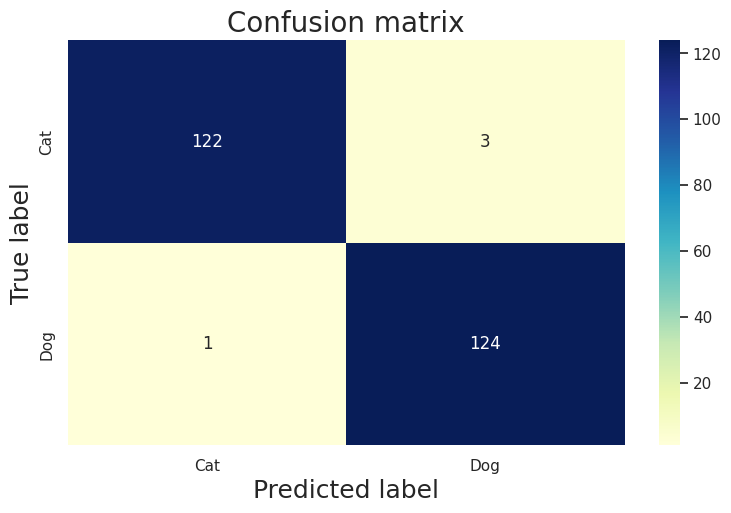

In [63]:
#create CF
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

---------------------------------------

In [64]:
img_path=X_test['filename'].tolist()
img_x  = predict_image(img_path[0])
img_x

1/1 [==============================] - 0s 38ms/step


array([9.9939382e-01, 6.0622446e-04], dtype=float32)

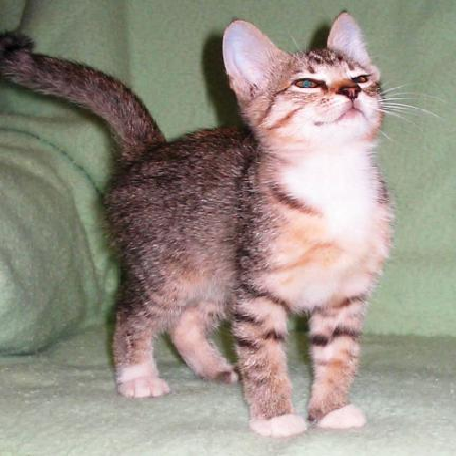

In [65]:
image.load_img(img_path[0], target_size=(height, width)) # plot testset